In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
"""For each y the length """
"""Difference between two x or two y cannot be larger than Nx/2 and samller than Nx"""

'Difference between two x or two y cannot be larger than Nx/2 and samller than Nx'

In [3]:
def f(a, b): 
        return 10*sum(divide(a**2 - b**2, (a**2 + b**2)**2 + 1e-323, dtype = float128), dtype = float128)

In [4]:
def g(a, b):
        return 10*sum(divide(2*a*b, (a**2 + b**2)**2 + 1e-323, dtype = float128), dtype = float128)

In [5]:
#Total particle number = N
#==============================
Nx = 21
N = Nx**2

#Location of the particles: axis = 1 indicates particle indices and axis = 2 indicates particle coordinates
#===========================================================================================================
psi = zeros((N,2), dtype = float128)

#Total time of evolution
#=======================
tmax = 50


for n in arange(Nx):
    for m in arange(Nx):
        psi[n + Nx*m,:] = array([n + 0.25*(1 - (-1)**m), sqrt(3/4, dtype = float128)*m]) + 0.002*random.normal(0,1,2)

P = zeros((5, N, 2), dtype = float128)
        
k1 = zeros(N, dtype = float128)
k2 = zeros(N, dtype = float128)
k3 = zeros(N, dtype = float128)
k4 = zeros(N, dtype = float128)

l1 = zeros(N, dtype = float128)
l2 = zeros(N, dtype = float128)
l3 = zeros(N, dtype = float128)
l4 = zeros(N, dtype = float128)

h = 0.01

start0 = time.time() 

x = zeros((N,N), dtype = float128)
y = zeros((N,N), dtype = float128)
x1 = zeros((N,N), dtype = float128)
y1 = zeros((N,N), dtype = float128)
x2 = zeros((N,N), dtype = float128)
y2 = zeros((N,N), dtype = float128)
x3 = zeros((N,N), dtype = float128)
y3 = zeros((N,N), dtype = float128)

ps = zeros((N,2), dtype = float128)



start0 = time.time() 
tc = 0

for t in arange(tmax):
    
    for i in arange(N):
        #================================================================
        #Inducing periodic boundary condition on the particle coordinates
        #================================================================
        ps[i,:] = psi[i,:]
        #====================
        if psi[i,0] >= Nx:
            ps[i,0] = psi[i,0] - Nx
        if psi[i,0] < 0:
            ps[i,0] = psi[i,0] + Nx
        #====================
        if psi[i,1] >= Nx*sqrt(3)/2:
            ps[i,1] = psi[i,1] - Nx*sqrt(3)/2
        if psi[i,1] < 0:
            ps[i,1] = psi[i,1] + Nx*sqrt(3)/2
        #====================
        
    
    for i in arange(N): 
        for j in arange(N):
            #==============================================================================
            #Inducing periodic boundary condition on the differences of particle coordinates
            """First-step of Runge-Kutta"""
            #==============================================================================
            x[j,i] = ps[j,0]-ps[i,0]
            #====================
            if x[j,i] >= Nx/2:
                x[j,i] = x[j,i] - Nx
            if x[j,i] < -Nx/2:
                x[j,i] = x[j,i] + Nx
            #====================
            y[j,i] = ps[j,1]-ps[i,1]
            #====================
            if y[j,i] >= (sqrt(3)/2)*Nx/2:
                y[j,i] = y[j,i] - (sqrt(3)/2)*Nx
            if y[j,i] < -(sqrt(3)/2)*Nx/2:
                y[j,i] = y[j,i] + (sqrt(3)/2)*Nx
            #====================  
               
        k1[i] = f(x[:,i], y[:,i])
        l1[i] = g(x[:,i], y[:,i])
        #============================================================
        
        
    for i in arange(N):    
        for j in arange(N):
            #==============================================================================
            #Inducing periodic boundary condition on the differences of particle coordinates
            """Second-step of Runge-Kutta"""
            #==============================================================================
            x1[j,i] = x[j,i] + h*k1[j]/2 - h*k1[i]/2
            #========================================
            if x1[j,i] >= Nx/2:
                x1[j,i] = x1[j,i] - Nx
            if x1[j,i] < -Nx/2:
                x1[j,i] = x1[j,i] + Nx
            #====================
            y1[j,i] = y[j,i] + h*l1[j]/2 - h*l1[i]/2
            #====================
            if y1[j,i] >= (sqrt(3)/2)*Nx/2:
                y1[j,i] = y1[j,i] - (sqrt(3)/2)*Nx
            if y1[j,i] < -(sqrt(3)/2)*Nx/2:
                y1[j,i] = y1[j,i] + (sqrt(3)/2)*Nx
            #====================
            
        k2[i] = f(x1[:,i], y1[:,i]) 
        l2[i] = g(x1[:,i], y1[:,i]) 
      
        #============================================================
    for i in arange(N):   
        for j in arange(N):
            #==============================================================================
            #Inducing periodic boundary condition on the differences of particle coordinates
            """Third-step of Runge-Kutta"""
            #==============================================================================
            x2[j,i] = x[j,i] + h*k2[j]/2 - h*k2[i]/2
            #========================================
            if x2[j,i] >= Nx/2:
                x2[j,i] = x2[j,i] - Nx
            if x2[j,i] < -Nx/2:
                x2[j,i] = x2[j,i] + Nx
            #=======================================    
            y2[j,i] = y[j,i] + h*l2[j]/2 - h*l2[i]/2
            #=======================================   
            if y2[j,i] >= (sqrt(3)/2)*Nx/2:
                y2[j,i] = y2[j,i] - (sqrt(3)/2)*Nx
            if y2[j,i] < -(sqrt(3)/2)*Nx/2:
                y2[j,i] = y2[j,i] + (sqrt(3)/2)*Nx
            #=============================
            
        k3[i] = f(x2[:,i], y2[:,i]) 
        l3[i] = g(x2[:,i], y2[:,i]) 
        
        #============================================================
    for i in arange(N):   
        for j in arange(N):
            #==============================================================================
            #Inducing periodic boundary condition on the differences of particle coordinates
            """Fourth-step of Runge-Kutta"""
            #==============================================================================
            x3[j,i] = x[j,i] + h*k3[j]/2 - h*k3[i]/2
            #========================================
            if x3[j,i] >= Nx/2:
                x3[j,i] = x3[j,i] - Nx
            if x3[j,i] < -Nx/2:
                x3[j,i] = x3[j,i] + Nx
            #=======================================    
            y3[j,i] = y[j,i] + h*l3[j]/2 - h*l3[i]/2
            #=======================================   
            if y3[j,i] >= (sqrt(3)/2)*Nx/2:
                y3[j,i] = y3[j,i] - (sqrt(3)/2)*Nx
            if y3[j,i] < -(sqrt(3)/2)*Nx/2:
                y3[j,i] = y3[j,i] + (sqrt(3)/2)*Nx
            #=============================
            
        k4[i] = f(x3[:,i], y3[:,i]) 
        l4[i] = g(x3[:,i], y3[:,i]) 
        
        psi[i,0] = psi[i,0] + (h/6)*(k1[i] + 2*k2[i] + 2*k3[i] + k4[i])
        psi[i,1] = psi[i,1] + (h/6)*(l1[i] + 2*l2[i] + 2*l3[i] + l4[i])
        
    if (t*h)%1==0:
        P[tc, :, :] = psi
        tc = tc + 1
        
end0 = time.time() 
print("time taken for each run =", end0 - start0) 

time taken for each run = 326.7659718990326


In [6]:
h*tmax 

0.5

In [7]:
shape(P)



(5, 441, 2)

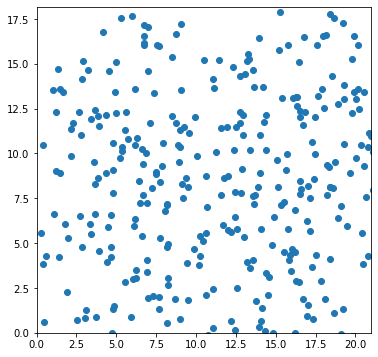

In [13]:
fig, ax = plt.subplots(figsize=(6,6))
scatter(psi[:,0], psi[:,1])

#ax.set_aspect(1)

xlim([0, Nx])

ylim([0, sqrt(3)*Nx/2])

show()

In [9]:
amax(P[1] - P[-1])

0.0

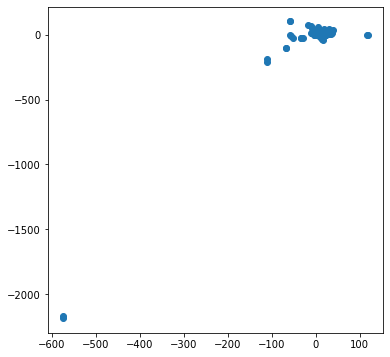

In [14]:
fig, ax = plt.subplots(figsize=(6,6))
scatter(psi[:,0], psi[:,1])

#ax.set_aspect(1)


show()

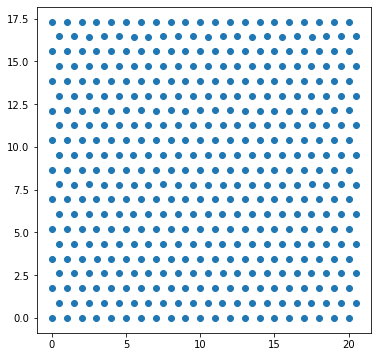

In [10]:


Psi = zeros((N,2), dtype = float128)

for n in arange(Nx):
    for m in arange(Nx):
        Psi[n + Nx*m,:] = array([n + 0.25*(1 - (-1)**m), sqrt(3/4, dtype = float128)*m]) + 0.002*random.normal(0,1,2)

fig, ax = plt.subplots(figsize=(6,6))
scatter(Psi[:,0], Psi[:,1])

#ax.set_aspect(1)


show()


In [11]:
"""It is not hexagonal of same length along x and y"""

'It is not hexagonal of same length along x and y'

In [16]:
20*sqrt(3)/2


17.32050807568877

In [12]:
"""-15 is equivalent to 16"""
"""or 0 is equivalent to 31"""

'or 0 is equivalent to 31'